In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K

from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import glob
import cv2
from PIL import Image
from numpy import asarray

from sklearn.metrics import confusion_matrix
import itertools


In [6]:
train = glob.glob("../../real_faces/train/**/*.jpg")
validation = glob.glob("../../real_faces/validation/**/*.jpg")

In [7]:
df_train = pd.DataFrame({"path":train})
df_validation = pd.DataFrame({"path":validation})

In [8]:
df_train["GT"] = df_train.path.apply(lambda x: x.split("/")[4])
df_validation["GT"] = df_validation.path.apply(lambda x: x.split("/")[4])

In [9]:
df_validation

,path,GT
0,../../real_faces/validation/disgust/34519.jpg,disgust
1,../../real_faces/validation/disgust/20761.jpg,disgust
2,../../real_faces/validation/disgust/12753.jpg,disgust
3,../../real_faces/validation/disgust/573.jpg,disgust
4,../../real_faces/validation/disgust/2732.jpg,disgust
...,...,...
7061,../../real_faces/validation/sad/34121.jpg,sad
7062,../../real_faces/validation/sad/22765.jpg,sad
7063,../../real_faces/validation/sad/13726.jpg,sad
7064,../../real_faces/validation/sad/19285.jpg,sad


In [10]:
df_train["array"]= df_train.path.apply(lambda x:asarray(Image.open(x)) )
df_validation["array"]= df_validation.path.apply(lambda x:asarray(Image.open(x)) )

In [11]:
df_train.head()

,path,GT,array
0,../../real_faces/train/disgust/17299.jpg,disgust,"[[71, 43, 22, 27, 28, 33, 38, 39, 43, 38, 31, ..."
1,../../real_faces/train/disgust/25955.jpg,disgust,"[[16, 11, 4, 16, 47, 81, 91, 85, 89, 95, 101, ..."
2,../../real_faces/train/disgust/28029.jpg,disgust,"[[18, 10, 9, 3, 1, 8, 8, 11, 11, 11, 10, 44, 6..."
3,../../real_faces/train/disgust/34692.jpg,disgust,"[[174, 172, 178, 122, 92, 108, 113, 112, 122, ..."
4,../../real_faces/train/disgust/29951.jpg,disgust,"[[165, 158, 120, 157, 231, 235, 231, 177, 111,..."


In [12]:
X_train = np.stack(df_train['array'])
X_train = X_train / 255.0
y_train=np.stack(df_train["GT"])

In [13]:
X_test = np.stack(df_validation['array'])
X_test = X_test / 255.0
y_test=df_validation["GT"]

In [75]:
img_rows, img_cols = 48,48
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [76]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:

epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(x=X_train,     
            y=y_train, 
                                epochs=epochs,
                                validation_data = (X_test,y_test),
                    batch_size=50,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.


TypeError: fit_generator() got an unexpected keyword argument 'x'

In [16]:
base_path = "../../real_faces/"

In [17]:
batch_size = 128
pic_size = 48

#Generate batches of tensor image data with real-time data augmentation.
#The data will be looped over (in batches).

The data will be looped over (in batches).
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
%%time

# number of epochs to train the NN
epochs = 30

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/30
225/225 [==============================] - 926s 4s/step - loss: 1.9463 - accuracy: 0.2448 - val_loss: 1.7552 - val_accuracy: 0.2635
Epoch 2/30
225/225 [==============================] - 923s 4s/step - loss: 1.8187 - accuracy: 0.2960 - val_loss: 1.6936 - val_accuracy: 0.3031
Epoch 3/30
225/225 [==============================] - 928s 4s/step - loss: 1.7410 - accuracy: 0.3271 - val_loss: 1.6672 - val_accuracy: 0.3574
Epoch 4/30
225/225 [==============================] - 923s 4s/step - loss: 1.6718 - accuracy: 0.3574 - val_loss: 1.6187 - val_accuracy: 0.3754
Epoch 5/30
225/225 [==============================] - 923s 4s/step - loss: 1.6070 - accuracy: 0.3819 - val_loss: 1.5288 - val_accuracy: 0.4084
Epoch 6/30
225/225 [==============================] - 922s 4s/step - loss: 1.5524 - accuracy: 0.4020 - val_loss: 1.5655 - val_accuracy: 0.4102
Epoch 7/30
225/225 [==============================] - 919s 4s/step - loss: 1.5092 - accuracy: 0.4191 - val_loss: 1.4721 - val_accuracy: 0.4287

Epoch 28/30
225/225 [==============================] - 912s 4s/step - loss: 0.9889 - accuracy: 0.6264 - val_loss: 1.0826 - val_accuracy: 0.5949
Epoch 29/30
225/225 [==============================] - 913s 4s/step - loss: 0.9725 - accuracy: 0.6345 - val_loss: 1.0490 - val_accuracy: 0.6155
Epoch 30/30
225/225 [==============================] - 916s 4s/step - loss: 0.9610 - accuracy: 0.6384 - val_loss: 1.0634 - val_accuracy: 0.6089
CPU times: user 14h 24min 17s, sys: 32min 58s, total: 14h 57min 16s
Wall time: 7h 40min 56s


In [11]:
model.save('my_model.h5')

In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json.dump(model_json, json_file)

In [2]:
import json
from keras.models import model_from_json
with open('model.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('my_model.h5')

Instructions for updating:
Please use Model.predict, which supports generators.


<Figure size 432x288 with 0 Axes>

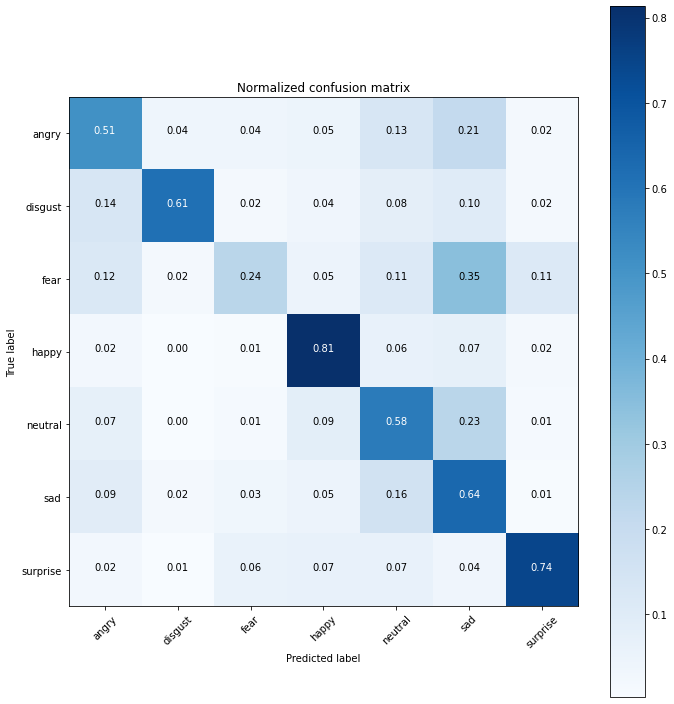

In [18]:
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()